In [1]:
#PRIMERO: Se leen las carpetas de los paises, la hidrografia y las ciudades que estan dentro de la carpeta mapas

In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [3]:
#SEGUNDO: Se llama al GeoDataFrame contries para hacer uso de la libreria pandas

In [4]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [5]:
#TERCERO: Se elige un pais, en este caso: Alemania

In [6]:
romania=countries[countries.COUNTRY=='Romania']

In [7]:
#CUARTO: Se plotea el mapa de Alemania y se configura el estilo de la imagen

In [8]:
    # Antes de plotear el mapa se verifica que posean el mismo sistema de proyeccion CRS

In [9]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
cities=cities.to_crs(countries.crs)
rivers=rivers.to_crs(countries.crs)

In [11]:
    #Ahora si se muestra a Alemania

<Axes: >

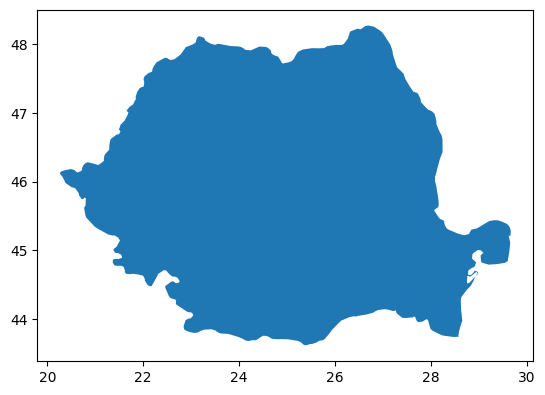

In [12]:
romania.plot() 

In [13]:
#QUINTO: Se muestra el numero y nombre de las ciudades en Alemania

In [14]:
cities=cities.to_crs(countries.crs)

In [15]:
cities_romania=cities[cities.COUNTRY=='Romania']
cities_romania.shape


(1, 4)

In [16]:
cities_romania.head()

,NAME,COUNTRY,CAPITAL,geometry
81,Bucuresti,Romania,Y,POINT (26.12298 44.43048)


In [17]:
#SEXTO: Se plotean las ciudades de Alemania

<Axes: >

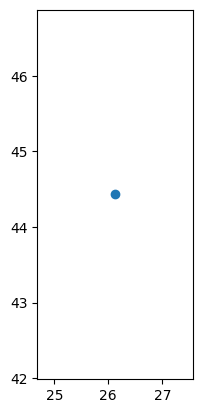

In [18]:
cities_romania=cities[cities.COUNTRY=='Romania']
cities_romania.plot()

In [19]:
#SETIMO: Se muestra el numero y nombres de los rios de Alemania

In [20]:
rivers_romania = gpd.clip(gdf=rivers,mask=romania)
rivers_romania.shape

(1, 3)

In [21]:
rivers_romania.head()

,NAME,SYSTEM,geometry
14,Danube,None,"MULTILINESTRING ((29.09397 45.23505, 29.64715 ..."


In [22]:
#OCTAVO: Se plotean los rios de Alemania

<Axes: >

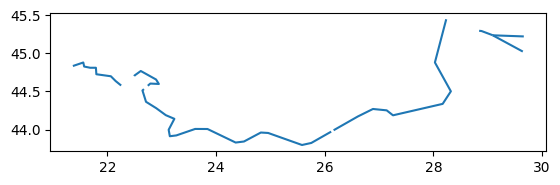

In [23]:
rivers_romania = gpd.clip(gdf=rivers,mask=romania)
rivers_romania.plot()

In [24]:
#NOVENO: Se plotean las 3 capas anteriores en una sola figura

<Axes: >

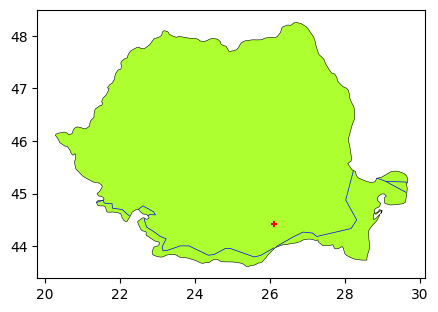

In [25]:
base = romania.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_romania.plot(marker='+', color='red', markersize=15,ax=base)
rivers_romania.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [26]:
#DECIMO: Se localiza el pais en el mapa mundia a traves de las cordenadas

In [27]:
    # Se establecen las cordenadas obtenidas del web: https://www.geodatos.net/en/coordinates

In [28]:
#romaniaCoord=[45.943161, 24.96676]

In [30]:
#m = cities_romania.explore(location=romaniaCoord,
                  # zoom_start=5,#zoom
                   #tiles='CartoDB positron',
                   #color='red',
                   #name="cities") 
#m = rivers_romania.explore(m=m, color="blue",
                   #name="rivers")
#m

In [31]:
    # Ahora veamos el mismo mapa de manera interactiva utilizando capas

In [32]:
#import folium
#m = cities_alemania.explore(location=alemaniaCoord,
                 #  zoom_start=5,#zoom
                  # tiles='CartoDB positron',
                   #color='red',
                   #name="cities") 
#m = rivers_alemania.explore(m=m, color="blue",
                   #name="rivers")
#folium.LayerControl().add_to(m)
#m

In [33]:
#ONCEAVO: Se reproyecta el CRS para obtener cordenadas, se usa este link: https://epsg.io/?q=Germany

In [34]:
romania.to_crs(3844).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [35]:
romania.to_crs(3844).centroid

185    POINT (498494.893 482206.445)
dtype: geometry

In [36]:
    # Se plotea con la nueva proyeccion y se obtiene el centroide en el mapa

<Axes: >

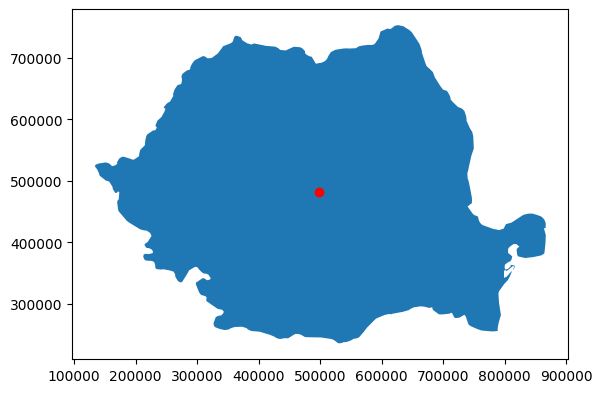

In [37]:
base4839=romania.to_crs(3844).plot()
romania.to_crs(3844).centroid.plot(color='red',ax=base4839)

In [38]:
    # Se reproyectan las ciudades y rios a fin de que todo este en el mismo CRS

In [40]:
romania_3844=romania.to_crs(3844)

cities_romania=cities[cities.COUNTRY=='Romania']
cities_3844=cities_romania.to_crs(romania_3844.crs)

rivers_3844=rivers.to_crs(romania_3844.crs)
rivers_3844=gpd.clip(gdf=rivers_3844,mask=romania_3844)

In [41]:
    # Se plotea el mapa reproyectado: primero Alemania

<Axes: >

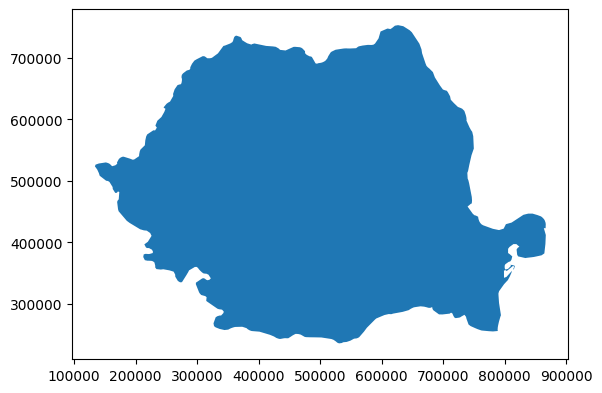

In [42]:
romania_3844.plot()

In [43]:
    # Se plotea el mapa reproyectado: segundo las ciudades de Alemania

<Axes: >

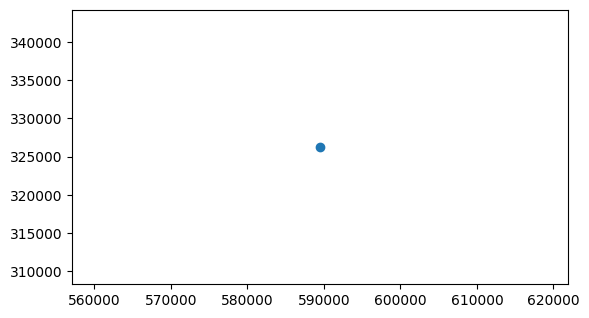

In [44]:
cities_3844.plot()

In [45]:
    # Se plotea el mapa reproyectado: tercero los rios de Alemania

<Axes: >

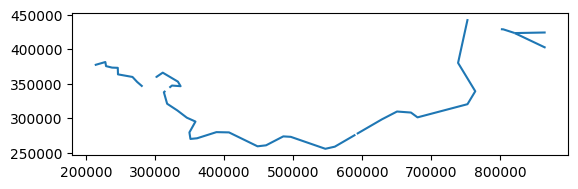

In [46]:
rivers_3844.plot()

In [47]:
    # Se plotea el mapa reproyectado uniendo a Alemania con sus ciudades y rios

<Axes: >

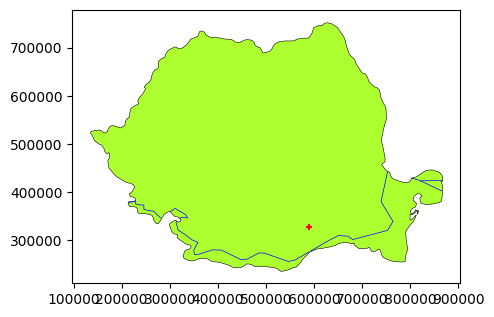

In [48]:
base = romania_3844.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_3844.plot(marker='+', color='red', markersize=15,ax=base)
rivers_3844.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [49]:
    # Se plotea el mapa reproyectado unificado e interactivo

In [50]:
#import folium
#m = cities_4839.explore(location=alemaniaCoord,
 #                  zoom_start=5,#zoom
    #               tiles='CartoDB positron',
     #              color='red',
      #             name="cities") 
#m = rivers_4839.explore(m=m, color="blue",
 #                  name="rivers")
#folium.LayerControl().add_to(m)
#m

In [51]:
#DOCEAVO: Se exporta el mapa en la carpeta "figures" como imagen

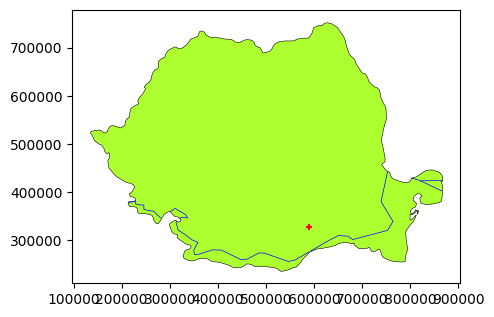

In [52]:
import matplotlib.pyplot as plt

base = romania_3844.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_3844.plot(marker='+', color='red', markersize=15,ax=base)
mapEnd=rivers_3844.plot(edgecolor='blue', linewidth=0.5,ax=base)
plt.savefig(os.path.join("figures",'mapRomania.jpg'))

In [ ]:
#TRECEAVO: Se guardan los 3 mapas reproyectados en un archivo de geopaquete

In [53]:
import os

romania_3844.to_file(os.path.join("maps","romania_3844","romaniaMaps_3844.gpkg"), layer='countries', driver="GPKG")
cities_3844.to_file(os.path.join("maps","romania_3844","romaniaMaps_3844.gpkg"), layer='cities', driver="GPKG")
rivers_3844.to_file(os.path.join("maps","romania_3844","romaniaMaps_3844.gpkg"), layer='rivers', driver="GPKG")

DriverError: sqlite3_open(maps\romania_3844\romaniaMaps_3844.gpkg) failed: unable to open database file

In [ ]:
#Link de GitHub

In [ ]:
#alemaniaMaps='https://github.com/Clases-y-Evaluaciones-DelaCruz-Diana/Evaluation2-DelaCruz/raw/main/maps/alemania_4839/alemaniaMaps_4839.gpkg'

In [ ]:
#from  fiona import listlayers 

#listlayers(romaniaMaps)

In [ ]:
#countries=gpd.read_file(romaniaMaps,layer='countries')
#cities=gpd.read_file(romaniaMaps,layer='cities')
#rivers=gpd.read_file(romaniaMaps,layer='rivers')

In [ ]:
#base = countries.plot(facecolor='gainsboro')
#cities.plot(ax=base, markersize=0.5, color='red') 
#rivers.plot(ax=base, linewidth=0.5)